Libraries

In [1]:
from Models import minimum_distance_classifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from Dimensionality import pca
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

Data

In [3]:
data = []
labels = []
with open("iris.data","r") as file:
    instances = file.readlines()
for instance in instances:
        valuesD = []
        values = instance.split(",")
        label = values[-1].removesuffix("\n")
        for i in range(len(values)-1):
            valuesD.append(float(values[i]))
        labels.append(int(label))
        data.append(valuesD)
data = np.array(data)
labels = np.array(labels)

PCA

In [4]:
c1_data=data[:50]
c2_data=data[50:100]
c3_data=data[100:]
c1_labels=labels[:50]
c2_labels=labels[50:100]
c3_labels=labels[100:]

c1c2_data = np.append(c1_data, c2_data, axis=0)
c1c2_labels = np.append(c1_labels, c2_labels)
c1c3_data = np.append(c1_data, c3_data, axis=0)
c1c3_labels = np.append(c1_labels, c3_labels)
c2c3_data = np.append(c2_data, c3_data, axis=0)
c2c3_labels = np.append(c2_labels, c3_labels)

c1c2_data_transformed = pca.PCA(c1c2_data,2)
c1c3_data_transformed = pca.PCA(c1c3_data,2)
c2c3_data_transformed = pca.PCA(c2c3_data,2)
data_transformed = pca.PCA(data,2)

Setosa - Versicolor

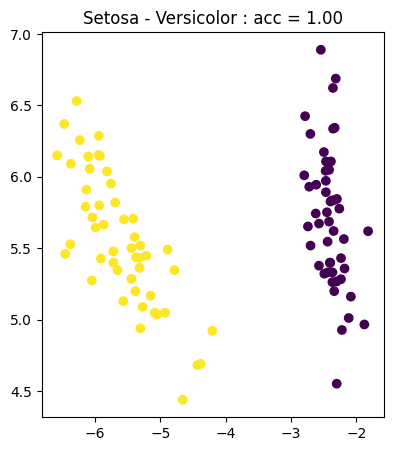

In [5]:
plt.figure(1,figsize=(15,5))

X_train, X_test, y_train, y_test = train_test_split(c1c2_data_transformed, c1c2_labels, test_size=0.2, random_state=42)
model = minimum_distance_classifier.MinimumDistanceClassifier(2)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.subplot(1,3,1)
plt.title(f"Setosa - Versicolor : acc = {accuracy:.2f}")
plt.scatter(c1c2_data_transformed[:,0],c1c2_data_transformed[:,1],c=c1c2_labels)

Setosa - Virginica

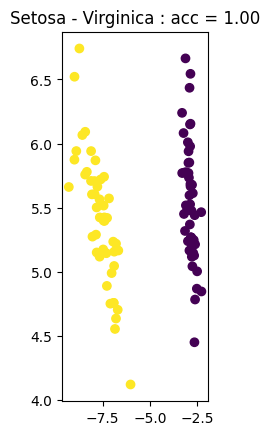

In [6]:
X_train, X_test, y_train, y_test = train_test_split(c1c3_data_transformed, c1c3_labels, test_size=0.2, random_state=42)
model = minimum_distance_classifier.MinimumDistanceClassifier(2)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.subplot(1,3,2)
plt.title(f"Setosa - Virginica : acc = {accuracy:.2f}")
plt.scatter(c1c3_data_transformed[:,0],c1c3_data_transformed[:,1],c=c1c3_labels)

Versicolor - Virginica

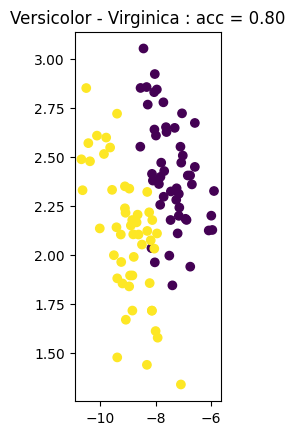

In [7]:
X_train, X_test, y_train, y_test = train_test_split(c2c3_data_transformed, c2c3_labels, test_size=0.2, random_state=42)
model = minimum_distance_classifier.MinimumDistanceClassifier(2)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.subplot(1,3,3)
plt.title(f"Versicolor - Virginica : acc = {accuracy:.2f}")
plt.scatter(c2c3_data_transformed[:,0],c2c3_data_transformed[:,1],c=c2c3_labels)

All classes

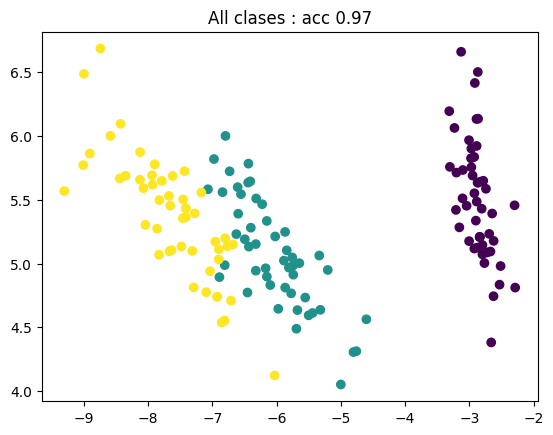

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data_transformed, labels, test_size=0.2, random_state=42)
model = minimum_distance_classifier.MinimumDistanceClassifier(3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(2)
plt.title(f"All clases : acc {accuracy:.2f}")
plt.scatter(data_transformed[:,0],data_transformed[:,1],c=labels)